    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Dataset shape: (50, 5)
Training data: (37, 2)
Test data: (13, 2)

Accuracy Score (Linear Kernel): 0.9230769230769231


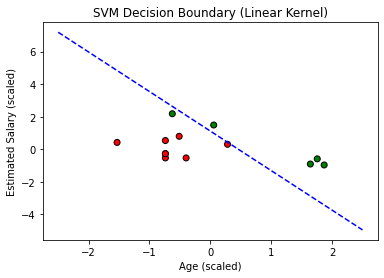


Accuracy Score (RBF Kernel): 0.9230769230769231


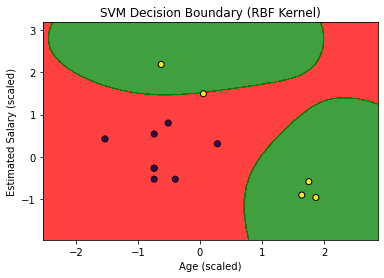


Accuracy Score (Polynomial Kernel, degree=4): 0.9230769230769231


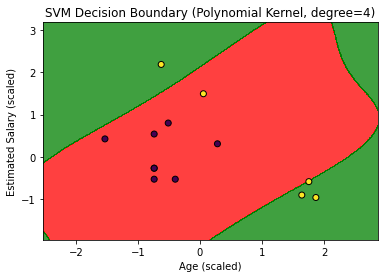


--- Summary ---
Linear Kernel Accuracy : 0.9230769230769231
RBF Kernel Accuracy : 0.9230769230769231
Poly Kernel Accuracy : 0.9230769230769231


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from matplotlib.colors import ListedColormap

df = pd.read_csv('Social_Networks_Ads.csv')
print(df.head())
print("Dataset shape:", df.shape)

X = df.iloc[:, [2, 3]].values
Y = df.iloc[:, 4].values 

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=0)
print("Training data:", X_Train.shape)
print("Test data:", X_Test.shape)


sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)


classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_Train, Y_Train)
Y_Pred_linear = classifier_linear.predict(X_Test)

print("\nAccuracy Score (Linear Kernel):", metrics.accuracy_score(Y_Test, Y_Pred_linear))

plt.figure(figsize=(6,4))
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=ListedColormap(('red','green')),
edgecolors='k')

w = classifier_linear.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier_linear.intercept_[0]) / w[1]
plt.plot(xx, yy, 'b--')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()

classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_Train, Y_Train)
Y_Pred_rbf = classifier_rbf.predict(X_Test)
print("\nAccuracy Score (RBF Kernel):", metrics.accuracy_score(Y_Test, Y_Pred_rbf))

plt.figure(figsize=(6,4))
X1, X2 = np.meshgrid(
np.arange(start=X_Test[:, 0].min()-1, stop=X_Test[:, 0].max()+1, step=0.01),
np.arange(start=X_Test[:, 1].min()-1, stop=X_Test[:, 1].max()+1, step=0.01)
)
plt.contourf(X1, X2, classifier_rbf.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, edgecolors='k')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()


classifier_poly = SVC(kernel='poly', degree=4, random_state=0)
classifier_poly.fit(X_Train, Y_Train)
Y_Pred_poly = classifier_poly.predict(X_Test)
print("\nAccuracy Score (Polynomial Kernel, degree=4):", metrics.accuracy_score(Y_Test,
Y_Pred_poly))

plt.figure(figsize=(6,4))
plt.contourf(X1, X2, classifier_poly.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, edgecolors='k')
plt.title('SVM Decision Boundary (Polynomial Kernel, degree=4)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()

print("\n--- Summary ---")
print("Linear Kernel Accuracy :", metrics.accuracy_score(Y_Test, Y_Pred_linear))
print("RBF Kernel Accuracy :", metrics.accuracy_score(Y_Test, Y_Pred_rbf))
print("Poly Kernel Accuracy :", metrics.accuracy_score(Y_Test, Y_Pred_poly))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


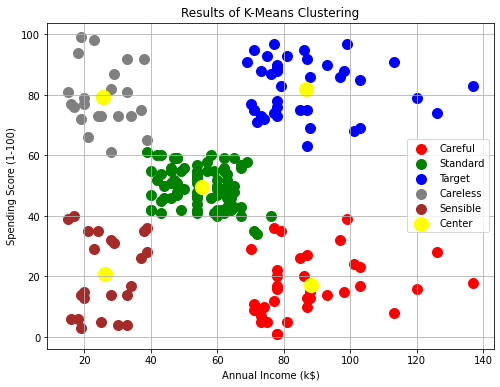

     Spending Score (1-100)  cluster
43                       61        1
46                       55        1
47                       47        1
48                       42        1
49                       42        1
..                      ...      ...
121                      40        1
122                      58        1
126                      35        1
132                      34        1
142                      40        1

[81 rows x 2 columns]


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mydata = pd.read_csv("Mall_Customers.csv")
print(mydata.head())

iv = mydata[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(iv)
iv.loc[:, 'cluster'] = kmeans.predict(iv) 


plt.figure(figsize=(8, 6))

plt.scatter(iv.loc[iv['cluster'] == 0, 'Annual Income (k$)'],
            iv.loc[iv['cluster'] == 0, 'Spending Score (1-100)'],
            s=100, c='red', label='Careful')

plt.scatter(iv.loc[iv['cluster'] == 1, 'Annual Income (k$)'],
            iv.loc[iv['cluster'] == 1, 'Spending Score (1-100)'],
            s=100, c='green', label='Standard')

plt.scatter(iv.loc[iv['cluster'] == 2, 'Annual Income (k$)'],
            iv.loc[iv['cluster'] == 2, 'Spending Score (1-100)'],
            s=100, c='blue', label='Target')

plt.scatter(iv.loc[iv['cluster'] == 3, 'Annual Income (k$)'],
            iv.loc[iv['cluster'] == 3, 'Spending Score (1-100)'],
            s=100, c='grey', label='Careless')

plt.scatter(iv.loc[iv['cluster'] == 4, 'Annual Income (k$)'],
            iv.loc[iv['cluster'] == 4, 'Spending Score (1-100)'],
            s=100, c='brown', label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Center')

plt.title("Results of K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

print(iv[iv['cluster'] == 1][['Spending Score (1-100)', 'cluster']])
